This notebook shows how our SVR package work, including cross validation and model training.

In [1]:
from sklearn.svm import SVR
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.externals import joblib
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

load processed data set to train our SVR model, and validate them.

In [2]:
    X1 = pd.read_csv('../Data/DataForSVR/GC_PCA.csv',index_col=0)
    y1 = pd.read_csv('../Data/NEWTrainingData_StandardScaler.csv',index_col=0).loc[:, ['Gravimetric Capacity (units)']]
    X2 = pd.read_csv('../Data/DataForSVR/VC_PCA.csv',index_col=0)
    y2 = pd.read_csv('../Data/NEWTrainingData_StandardScaler.csv',index_col=0).loc[:, ['Volumetric Capacity']]
    X3 = pd.read_csv('../Data/DataForSVR/MDV_PCA.csv',index_col=0)
    y3 = pd.read_csv('../Data/NEWTrainingData_StandardScaler.csv',index_col=0).loc[:, ['Max Delta Volume']]

In [6]:
X1_train,X1_test, y1_train, y1_test =train_test_split(X1,y1,test_size=0.2, random_state=123)
X2_train,X2_test, y2_train, y2_test =train_test_split(X2,y2,test_size=0.2, random_state=123)
X3_train,X3_test, y3_train, y3_test =train_test_split(X3,y3,test_size=0.2, random_state=123)

Training model with SVR model with rbf kernal function, and print the MSE and $R{2}$

In [10]:
    
    svr = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=16.0, epsilon=0.1, \
              shrinking=True, cache_size=200, verbose=False, max_iter=-1)
    svr.fit(X1_train, y1_train)
    #joblib.dump(svr, 'svr_GC.pkl')
    y1_pred=svr.predict(X1_test)
    print(mean_squared_error(y1_test, y1_pred)) 
    print(r2_score(y1_test,y1_pred))

0.33136629285159
0.7047146415804826


In [11]:
    svr = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=8.0, epsilon=0.1, \
              shrinking=True, cache_size=200, verbose=False, max_iter=-1)
    svr.fit(X2_train, y2_train)
    #joblib.dump(svr, 'svr_CV.pkl') 
    y2_pred=svr.predict(X2_test)
    print(mean_squared_error(y2_test, y2_pred)) 
    print(r2_score(y2_test,y2_pred))

0.3019634215812373
0.7280673360654664


In [12]:
    svr = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=4.8, epsilon=0.1, \
              shrinking=True, cache_size=200, verbose=False, max_iter=-1)
    svr.fit(X3_train, y3_train)
    #joblib.dump(svr, 'svr_MDV.pkl') 
    y3_pred=svr.predict(X3_test)
    print(mean_squared_error(y3_test, y3_pred)) 
    print(r2_score(y3_test,y3_pred))

0.013030072473806137
0.8038315261297109


Here we load saved model in .pkl file, then use 10 fold cross validation to get mean MSE and $R{2}$

In [3]:

    svr_cg = joblib.load('svr_GC.pkl')
    svr_cv = joblib.load('svr_CV.pkl')
    svr_mdv = joblib.load('svr_MDV.pkl')

    kf = KFold(n_splits=10, shuffle=True)
    kf.get_n_splits(X1, y1)   
    list_mse=[]
    list_R2=[]
    for train_index, test_index in kf.split(X1, y1):
        X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
        y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]
        y1_pred = svr_cg.predict(X1_test)
        list_mse.append(mean_squared_error(y1_test, y1_pred))
        list_R2.append(r2_score(y1_test,y1_pred))
    print(pd.Series(list_mse).mean())
    print(pd.Series(list_R2).mean())
    


0.09270279792016779
0.8932005971820075


In [4]:
    kf = KFold(n_splits=10, shuffle=True)
    kf.get_n_splits(X2, y2)   
    list_mse=[]
    list_R2=[]
    for train_index, test_index in kf.split(X2, y2):
        X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
        y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]
        y2_pred = svr_cv.predict(X2_test)
        list_mse.append(mean_squared_error(y2_test, y2_pred))
        list_R2.append(r2_score(y2_test,y2_pred))
    print(pd.Series(list_mse).mean())
    print(pd.Series(list_R2).mean())

0.09156795891580712
0.8964330893514024


In [5]:
    kf = KFold(n_splits=10, shuffle=True)
    kf.get_n_splits(X3, y3)   
    list_mse=[]
    list_R2=[]
    for train_index, test_index in kf.split(X3, y3):
        X3_train, X3_test = X3.iloc[train_index], X3.iloc[test_index]
        y3_train, y3_test = y3.iloc[train_index], y3.iloc[test_index]
        y3_pred = svr_mdv.predict(X3_test)
        list_mse.append(mean_squared_error(y3_test, y3_pred))
        list_R2.append(r2_score(y3_test,y3_pred))
    print(pd.Series(list_mse).mean())
    print(pd.Series(list_R2).mean())

0.6260500969700062
0.7966426044743085


Finally, we plot the predicted value vs. target value as visualization of model evaluation.

In [38]:
from sklearn import linear_model

%matplotlib inline


B0, B1:  [0.02950322] [1.09974693]


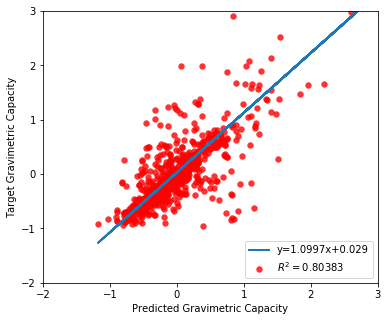

In [76]:
regr1=linear_model.LinearRegression() 
regr1.fit(np.array(y1_pred).reshape(-1,1),np.array(y1_test).reshape(-1,1))
print('B0, B1: ',regr1.intercept_, regr1.coef_[0])
plt.figure(figsize=(6,5))
plt.scatter(y1_pred,y1_test,color='red',lw='0.3',alpha=0.8,label='$R^{2}=0.80383$')
plt.plot(np.array(y1_pred).reshape(-1,1),regr1.predict(np.array(y1_pred).reshape(-1,1)),label='y=1.0997x+0.029',lw=2)
plt.xlim(-2,3)
plt.ylim(-2,3)
plt.xlabel('Predicted Gravimetric Capacity')
plt.ylabel('Target Gravimetric Capacity')
plt.legend(loc='lower right')
plt.savefig('../../images/SVR_GC.png')

B0, B1:  [0.04625934] [1.13619234]


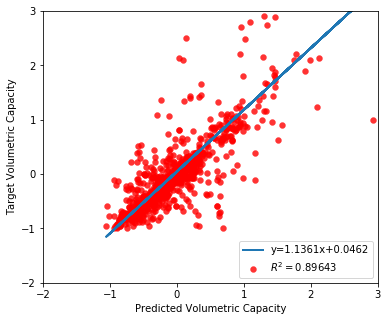

In [75]:
regr2=linear_model.LinearRegression() 
regr2.fit(np.array(y2_pred).reshape(-1,1),np.array(y2_test).reshape(-1,1))
print('B0, B1: ',regr2.intercept_, regr2.coef_[0])
plt.figure(figsize=(6,5))
plt.scatter(y2_pred,y2_test,color='red',lw='0.3',alpha=0.8,label='$R^{2}=0.89643$')
plt.plot(np.array(y2_pred).reshape(-1,1),regr2.predict(np.array(y2_pred).reshape(-1,1)),label='y=1.1361x+0.0462',lw=2)
plt.xlim(-2,3)
plt.ylim(-2,3)
plt.xlabel('Predicted Volumetric Capacity')
plt.ylabel('Target Volumetric Capacity')
plt.legend(loc='lower right')
plt.savefig('../../images/SVR_CV.png')

B0, B1:  [-0.02556932] [0.98138721]


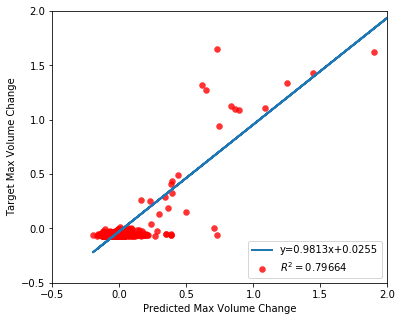

In [74]:
regr3=linear_model.LinearRegression() 
regr3.fit(np.array(y3_pred).reshape(-1,1),np.array(y3_test).reshape(-1,1))
print('B0, B1: ',regr3.intercept_, regr3.coef_[0])
plt.figure(figsize=(6,5))
plt.scatter(y3_pred,y3_test,color='red',lw='0.4',alpha=0.8,label='$R^{2}=0.79664$')
plt.plot(np.array(y3_pred).reshape(-1,1),regr3.predict(np.array(y3_pred).reshape(-1,1)),label='y=0.9813x+0.0255',lw=2)
plt.xlim(-0.5,2)
plt.ylim(-0.5,2)
plt.xlabel('Predicted Max Volume Change')
plt.ylabel('Target Max Volume Change')
plt.legend(loc='lower right')
plt.savefig('../../images/SVR_MDV.png')